<a href="https://colab.research.google.com/github/JakeOh/202004_iw_pyda_wkd/blob/master/python_da_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
tips = sns.load_dataset('tips')

In [0]:
pd.options.display.max_rows = 10
# pandas 객체들을 프린트할 때 최대 10개 라인까지만 출력

In [4]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


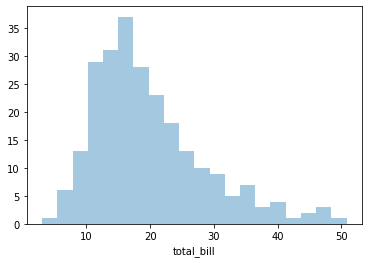

In [10]:
# matplotlib.pyplot을 이용해서 히스토그램과 비슷한 그래프.
# 해당 구간의 빈도수가 아니라 밀도를 계산해서 막대 그래프를 그림.
# Distribution plot(분포 그래프)
sns.distplot(tips['total_bill'],
             bins=20,
             hist=True,
             kde=False)
# bins: 막대의 개수
# hist: 히스토그램을 그릴 것(True)인지 아닌지(False)를 결정. 기본값 True.
# kde: Kernel Density Estimation.
#   밀도 그래프를 그릴 것(True)인지 아닌지(False)를 결정. 기본값 True.
plt.show()

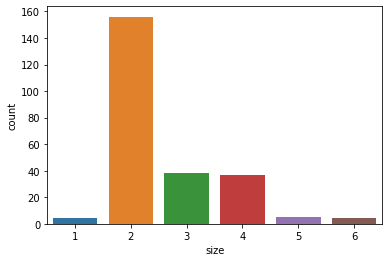

In [14]:
# Count plot
# Categorical 변수(범주형 변수)의 빈도수를 나타낸 막대 그래프
sns.countplot(x='size', data=tips)
plt.show()

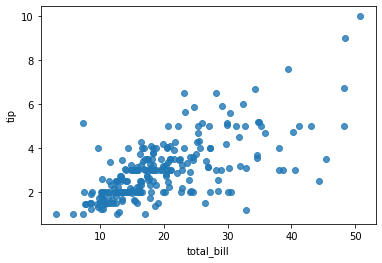

In [17]:
# 두 변수의 상관 관계
# Regression plot(회귀 그래프)
sns.regplot(x='total_bill', y='tip', data=tips,
            fit_reg=False)
# fit_reg: 회귀 직선을 그릴지(True) 말지(False)를 결정. 기본값은 True.
plt.show()

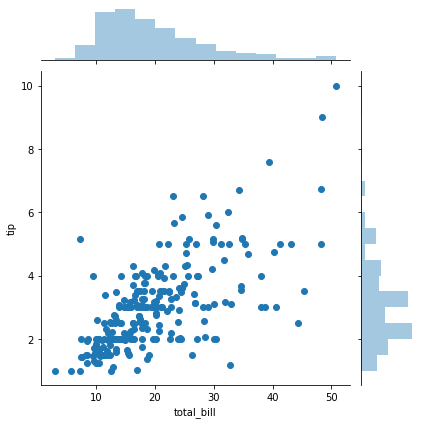

In [19]:
# Joint plot
# 두 변수의 상관관계를 scatter plot으로 그리고
# 각 변수들의 히스토그램을 함께 표현한 그래프
sns.jointplot(x='total_bill', y='tip', data=tips)
plt.show()

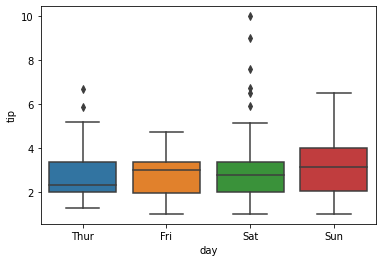

In [21]:
# box plot
# sns.boxplot(x='sex', y='tip', data=tips)  # 성별 tip
sns.boxplot(x='day', y='tip', data=tips)  # 요일별 tip
plt.show()

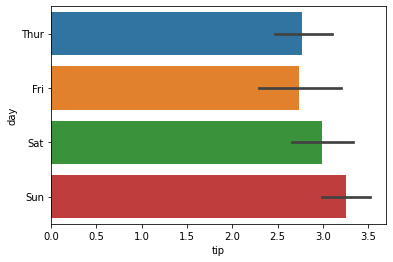

In [23]:
# 막대 그래프(bar plot)
# 요일별 tip의 평균
# sns.barplot(x='day', y='tip', data=tips)  # 세로 막대 그래프
sns.barplot(x='tip', y='day', data=tips)  # 가로 막대 그래프
plt.show()

In [25]:
# 실제 식사한 금액 대비 tip의 비율
# total_bill = 식사 + 팁
# tips 데이터 프레임에 팁의 비율을 나타내는 컬럼(tip_pct)를 추가
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899


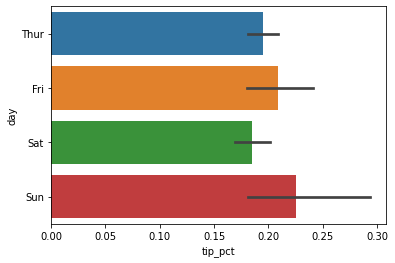

In [26]:
# 요일별 팁 퍼센티지 평균
sns.barplot(x='tip_pct', y='day', data=tips)
plt.show()

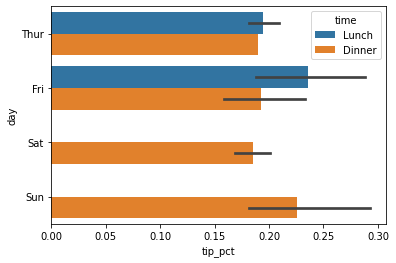

In [27]:
# 요일별, 시간별 팁 퍼센티지 평균
sns.barplot(x='tip_pct', y='day', hue='time', data=tips)
plt.show()

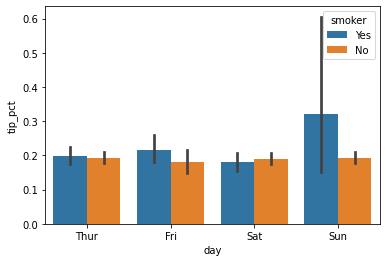

In [28]:
sns.barplot(x='day', y='tip_pct', hue='smoker', data=tips)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


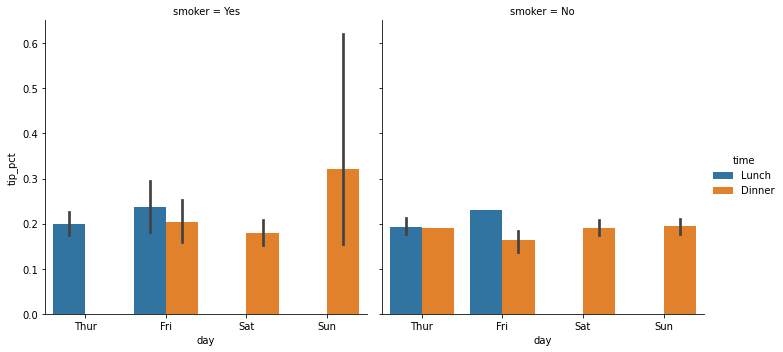

In [31]:
# factor plot - 카테고리 별로 그래프를 분리해서 그림.
sns.factorplot(x='day', y='tip_pct', hue='time',
               col='smoker',
               kind='bar',
               data=tips)
# col: subplot에서 컬럼에 사용할 변수 이름
# row: subplot에서 행에 사용할 변수 이름
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


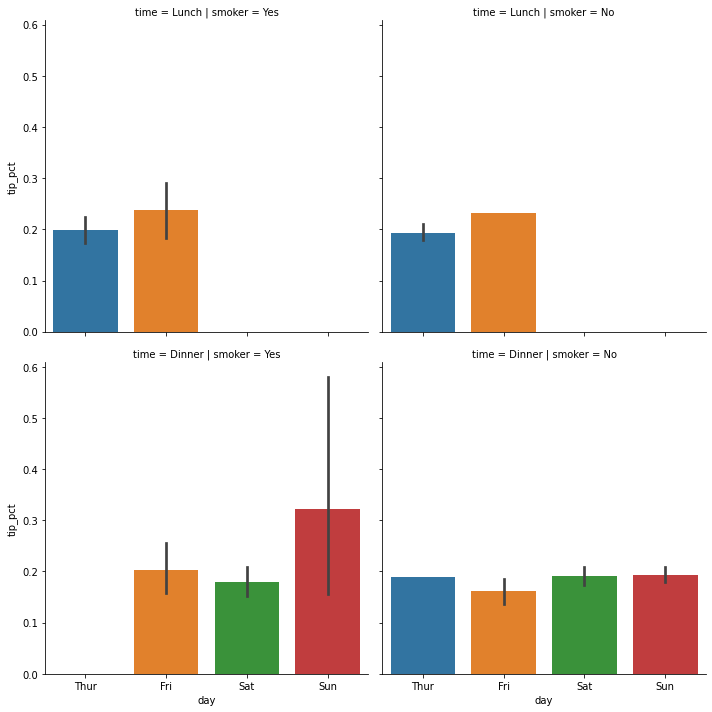

In [32]:
sns.factorplot(x='day', y='tip_pct',
               row='time', col='smoker',
               kind='bar',
               data=tips)
plt.show()